In [8]:
from scenedetect import detect, AdaptiveDetector, ThresholdDetector
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#read pickle data
import pickle
from itertools import compress
from textwrap import wrap
def plotshorts(AllVids):
        for i,n in enumerate(AllVids.List['Name']):
            x=AllVids.cut_time
            y=AllVids.List['AvgD'][i]
            fig, ax = plt.subplots(nrows=1)
            fig.set_figheight(2)
            fig.set_figwidth(25)

def plottimes(AllVids):
    for i,n in enumerate(AllVids.List['Name']):
        x=AllVids.cut_time
        y=AllVids.List['AvgD'][i]
        fig, ax = plt.subplots(nrows=1)
        fig.set_figheight(1)
        fig.set_figwidth(25)

        #extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
        extent = [x[0], x[-1]+(x[1]-x[0]),0,1]
        img=ax.imshow([y], cmap="viridis", aspect="auto",vmin=.0,vmax=10,extent=extent)
        #sns.heatmap([y], fmt="g", cmap='viridis',ax=ax)
        ax.set_yticks([])
        ax.set_xlim(extent[0], extent[1])
        #ax.set_title('/n'.join(wrap(AllVids.List['Name'][i], 32)))
        s=AllVids.List['Name'][i][0:-4]
        ax.set_title(s.rsplit('/',1)[1],fontweight="bold",fontsize=15)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        xticks=np.linspace(0,AllVids.MINUTE,AllVids.MINUTE+1)
        
        ax.get_xaxis().set_ticks(xticks)
        plt.xticks(fontsize=15)
        #ax.set_xlim(0, MINUTE)

        # ax2.plot(x,y)
        # ax2.set_xlim(0,AllVids.MINUTE)
        # ax2.set_ylim(.5,10)
        # ax2.set_xlabel(AllVids.List['Name'][i])
        #plt.tight_layout()
        #plt.colorbar(img)
        #plt.show()
        plt.savefig(s+'.png',pad_inches=1, transparent=True,bbox_inches='tight')


class AllVids():
    def __init__(self):
        self.List={"Name":[], 'scenelist':[],'Frametime':[],'Duration':[],'Cuts':[],'AvgD':[]}
        self.MINUTE=1
        self.sec_divider=4
        N=self.MINUTE*self.sec_divider+1
        self.cut_time=np.linspace(0,self.MINUTE,N)

    def add_video(self,name,scenelist):
        self.List['Name'].append(name)
        self.List['scenelist'].append(scenelist)
        self.List['Duration'].append([])
        self.List['Frametime'].append([])
        self.List['Cuts'].append([])
        self.List['AvgD'].append([])
    def show_name(self):
        print(self.List['Name'])
        print(self.List['Frametime'])
        print(self.List['Duration'])

    def count_vids(self):
        print(len(self.List))
    
    def set_MINUTE(self,MINUTE,sec_divider):
        self.MINUTE=MINUTE
        self.sec_divider=sec_divider
        N=self.MINUTE*self.sec_divider+1
        self.cut_time=np.linspace(0,self.MINUTE,N)
        
        
    
    def addcuts(self):
        N=self.MINUTE*self.sec_divider+1 #sets up the number of bins by getting the number of minutes and the dividins
        x=self.cut_time
        for i,n in enumerate(self.List['Name']):
            FRT=self.List['Frametime'][i]
            N=self.MINUTE*self.sec_divider+1
            count=np.empty(N) * np.nan
            avgd=np.empty(N) * np.nan
            for j in range(N):
                #print('x[j]: '+str(x[j])+' x[j]+: '+ str(x[j]+1/self.sec_divider))
                #print(list(compress(self.List['Frametime'][i],(FRT > x[j]) & (FRT <= x[j]+1/self.sec_divider))))

                dummy=((FRT > x[j]) & (FRT <= x[j]+1/self.sec_divider)).sum()
                #print('Count:'+ str(dummy))
                if x[j]>FRT[-1]:
                    dummy=np.nan

                dummy2=list(compress(self.List['Duration'][i],(FRT > x[j]) & (FRT <= x[j]+1/self.sec_divider)))
                if len(dummy2)!=0:
                    avgd[j]=(sum(dummy2)/len(dummy2))
                    #print('Scene duration:'+ str(dummy2))
                    #print('Average:'+ str(sum(dummy2)/len(dummy2)))
                elif x[j]<FRT[-1]:
                    avgd[j]=avgd[j-1]
                    
                count[j]=dummy
            self.List['Cuts'][i]=[]    
            self.List['Cuts'][i]=count
            self.List['AvgD'][i]=[]    
            self.List['AvgD'][i]=avgd

    def add_duration(self):        
        for i,n in enumerate(self.List['Name']):
            scl=self.List['scenelist'][i]
            duration=[]
            FrameTime=[]
            
            for j in range(len(scl)):

                #print('From: ' + str(scene_list[i][0])+ ' to: '+ str(scene_list[i][1]))
                tim=datetime.strptime(str(scl[j][0]),'%H:%M:%S.%f') #gets the start time of the scene in question
                if (tim.minute)<self.MINUTE:
                    dur=datetime.strptime(str(scl[j][1]-scl[j][0]),'%H:%M:%S.%f')
                    duration.append(dur.second+(dur.microsecond/1000000))#finds the difference between the end time and the start time of the scene
                    FrameTime.append((tim.minute)+(tim.second/60)+(tim.microsecond/60000000))
            self.List['Duration'][i]=[]
            self.List['Frametime'][i]=[]
            self.List['Duration'][i]=duration
            self.List['Frametime'][i]=FrameTime
        self.addcuts()

class ShortVids():
    def __init__(self):
        self.List={"Name":[], 'scenelist':[],'Frametime':[],'Duration':[]}
        self.MINUTE=1
        self.sec_divider=4
        N=self.MINUTE*self.sec_divider+1
        self.cut_time=np.linspace(0,self.MINUTE,N)

    def add_video(self,name,scenelist):
        self.List['Name'].append(name)
        self.List['scenelist'].append(scenelist)
        self.List['Duration'].append([])
        self.List['Frametime'].append([])

    def show_name(self):
        print(self.List['Name'])
        print(self.List['scenelist'])
        print(self.List['scenelist'][-1])
        print(self.List['AvgD'])

    def set_MINUTE(self,MINUTE,sec_divider):
        self.MINUTE=MINUTE
        self.sec_divider=sec_divider
        N=self.MINUTE*self.sec_divider+1
        self.cut_time=np.linspace(0,self.MINUTE,N)
        
    
    def add_duration(self):        
        for i,n in enumerate(self.List['Name']):
            scl=self.List['scenelist'][i]
            duration=[]
            FrameTime=[]
            
            for j in range(len(scl)):

                #print('From: ' + str(scene_list[i][0])+ ' to: '+ str(scene_list[i][1]))
                tim=datetime.strptime(str(scl[j][0]),'%H:%M:%S.%f') #gets the start time of the scene in question
                if (tim.minute)<self.MINUTE:
                    dur=datetime.strptime(str(scl[j][1]-scl[j][0]),'%H:%M:%S.%f')#finds the difference between the end time and the start time of the scene
                    duration.append(dur.second+(dur.microsecond/1000000))
                    FrameTime.append((tim.minute)+(tim.second/60)+(tim.microsecond/60000000))
            self.List['Duration'][i]=[]
            self.List['Frametime'][i]=[]
            self.List['Duration'][i]=duration
            self.List['Frametime'][i]=FrameTime



In [ ]:
with open('MarkLong.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    MarkVids = pickle.load(file)
MarkVids.set_MINUTE(28,4)
MarkVids.add_duration()
plottimes(MarkVids)

In [14]:
with open('MarkShorts.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    MarkShorts= pickle.load(file) 
with open('CleoStored.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    CleoVids= pickle.load(file)
with open('Vsauce.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    Vsauce= pickle.load(file)
with open('Veri.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    Veri= pickle.load(file) 


1.6024166666666664
2.4812666666666674
13.729285714285714
11.138874999999999


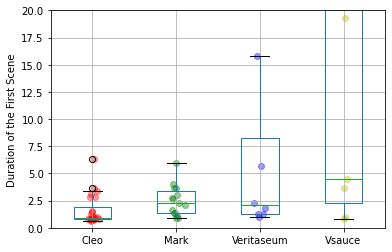

In [17]:
c=[]
m=[]
v=[]
ver=[]

for i in range(len(CleoVids.List['Name'])):
    c.append(CleoVids.List['Frametime'][i][0]*60)
for i in range(len(MarkShorts.List['Name'])):
    m.append(MarkShorts.List['Frametime'][i][0]*60)
for j in range(len(Vsauce.List['Name'])):
    if Vsauce.List['Frametime'][j]:
        v.append(Vsauce.List['Frametime'][j][0]*60)
    else:
        v.append(1)
for j in range(len(Veri.List['Name'])):
    if Veri.List['Frametime'][j]:
        ver.append(Veri.List['Frametime'][j][0]*60)
    else:
        ver.append(60)

d = dict( Cleo = c,  Mark=m, Veritaseum=ver, Vsauce=v)
#d = dict( Cleo = c,  Mark=m,Veritaseum=ver)

    
df=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
fig, ax = plt.subplots()
df.boxplot()
vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))
print(sum(c)/len(c))
print(sum(m)/len(m))
print(sum(v)/len(v))
print(sum(ver)/len(ver))
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
ax.set_ylim(0,20)
ax.set_ylabel('Duration of the First Scene')
plt.show()
